In [3]:
#
# http://wiki.quantsoftware.org/index.php?title=QSTK_Tutorial_1
#
import QSTK.qstkutil.qsdateutil as du
import QSTK.qstkutil.tsutil as tsu
import QSTK.qstkutil.DataAccess as da

import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/QSTK-0.2.8-py2.7.egg/QSTK/qstkutil/qsdateutil.py:36: FutureWarning: TimeSeries is deprecated. Please use Series
  return pd.TimeSeries(index=dates, data=dates)


In [4]:
# $SPX is index of S&P 500
ls_symbols = ["AAPL", "GLD", "GOOG", "$SPX", "XOM"]
dt_start = dt.datetime(2006, 1, 1)
dt_end = dt.datetime(2010, 12, 31)
dt_timeofday = dt.timedelta(hours=16)
ldt_timestamps = du.getNYSEdays(dt_start, dt_end, dt_timeofday)

In [7]:
c_dataobj = da.DataAccess('Yahoo')
ls_keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close']
ldf_data = c_dataobj.get_data(ldt_timestamps, ls_symbols, ls_keys)
d_data = dict(zip(ls_keys, ldf_data))

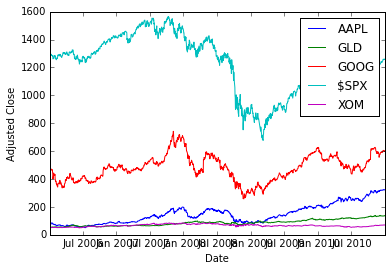

In [8]:
na_price = d_data['close'].values
plt.clf()
plt.plot(ldt_timestamps, na_price)
plt.legend(ls_symbols)
plt.ylabel('Adjusted Close')
plt.xlabel('Date')
plt.savefig('adjustedclose.pdf', format='pdf')

In [9]:
na_normalized_price = na_price / na_price[0, :]

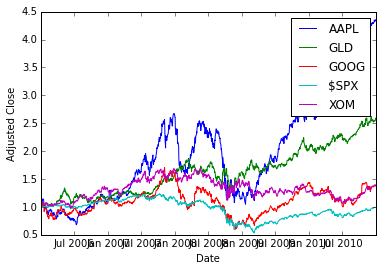

In [11]:
plt.clf()
plt.plot(ldt_timestamps, na_normalized_price)
plt.legend(ls_symbols)
plt.ylabel('Adjusted Close')
plt.xlabel('Date')

In [12]:
#
# Daily returns
# ret(t) = (price(t)/price(t-1)) -1
#
na_rets = na_normalized_price.copy()
tsu.returnize0(na_rets)

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  2.95579739e-03,   3.38855422e-03,   2.29993337e-02,
          3.67276166e-03,   1.78323757e-03],
       [ -7.90354990e-03,  -1.80112570e-02,   1.34758782e-02,
          1.57052440e-05,  -4.94462025e-03],
       ..., 
       [  2.44362647e-03,   1.62938824e-02,  -5.74388260e-03,
          7.71347233e-04,   5.57222460e-03],
       [ -5.55418415e-04,   3.57090803e-03,   3.47291792e-03,
          1.00912984e-03,  -5.68343279e-04],
       [ -5.00154369e-03,  -4.93791301e-03,  -3.56073211e-03,
         -1.50819984e-03,  -1.42166619e-04]])

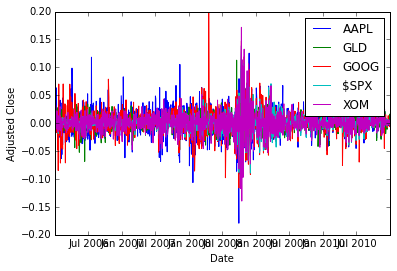

In [13]:
plt.clf()
plt.plot(ldt_timestamps, na_rets)
plt.legend(ls_symbols)
plt.ylabel('Adjusted Close')
plt.xlabel('Date')

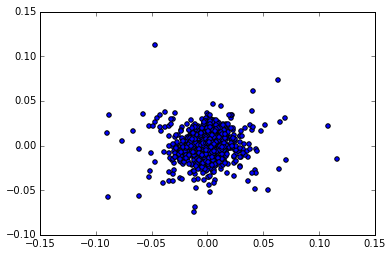

In [14]:
plt.scatter(na_rets[:, 3], na_rets[:, 1], c='blue')

In [15]:
#
# Using the daily returns we can reconstruct cumulative daily returns. 
# daily_cum_ret(t) = daily_cum_ret(t-1) * (1 + daily_ret(t))
#
